# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [66]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#this function will give two outputs, one of the sorted data and one of the values shown on a scale of 0 to 1
def ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y
#this function will create multiple bootstraps from an array
def draw_bs_reps(data, func, size=1):


    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

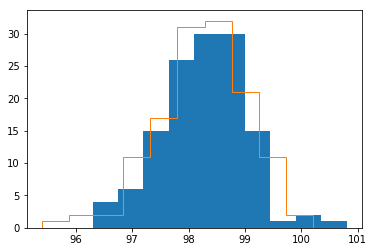

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#1. Is the distribution normal?
temp = df.temperature
temp_mean = np.mean(temp)
temp_std = np.std(temp)

normal_curve = np.random.normal(temp_mean,temp_std,len(temp))

plt.hist(temp)
plt.hist(normal_curve, histtype='step')
plt.show()
#there is a chance of binning bias but the temperatures are very close to a normal distribution (without being exact)

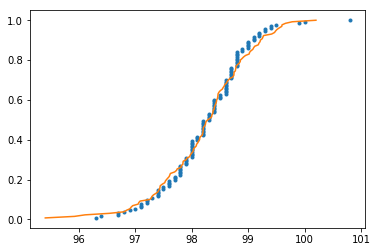

In [69]:
x_temp, y_temp = ecdf(temp)
x_theor, y_theor = ecdf(normal_curve)
plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.plot(x_theor,y_theor)
plt.show()
#using the cdf our data appears to be very close to a normal distribution

In [70]:
#2. Is the sample size large? Are the observations independent?

print(len(temp))

#The sample size is not large, 130 is simply not big enough to be considered a large sample size.
#The observations are independent, because the value of any one observation does not effect the value of other observations.

130


In [72]:
#3 Is the true population mean 98.6?

#Bootstrap Hypothesis Test

#Hypothesis: The true mean body temperature is in fact 98.6 degrees.

translated_test_temp = temp + 98.6 - np.mean(temp)
#this translated data now has a mean of 98.6
bs_replicates = draw_bs_reps(translated_test_temp,np.mean,10000)
p = np.sum(bs_replicates <= np.mean(temp)) / len(bs_replicates)
print(p)

#A p value of zero indicates that our null hypothesis is false! Perhaps the true mean temperature of the population is
#actually lower than 98.6

0.0
